# Product Segmentation Case Study

## Context

When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data Scientist in a market research company, you have been given the task of extracting insights from the data of men's and women's shoes, and grouping products together to identify similarities and differences between the product range of these renowned brands.

## Objective

To perform an exploratory data analysis and cluster the products based on various factors


## Key Questions

- Which variables are most important for clustering?
- How each cluster is different from the others?
- What are the business recommendations?


## Data Description

The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

- Product Name: Name of the product
- Product ID: ID of the product
- Listing Price: Listed price of the product
- Sale Price: Sale price of the product
- Discount: Percentage of discount on the product
- Brand: Brand of the product
- Rating: Rating of the product
- Reviews: Number of reviews for the product

## Let's start coding!

### Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler


# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans, DBSCAN


# import silhouette metrics
from sklearn.metrics import silhouette_score


# import itertools
import itertools



In [ ]:
# loading the dataset
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/data science /hull online/Ailead/ML /Unsupervise learning /data_add_nik.csv")

In [ ]:
# check the dimension of the data
data.shape


(3268, 8)

* The dataset has 3268 rows and 8 columns

In [ ]:
# viewing a random sample of the dataset

data.sample(5)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
2269,Men's adidas Running AlphaBoost Parley Shoes,EF1162,14999,10499,30,Adidas SPORT PERFORMANCE,5.0,52
1975,Men's adidas Originals Supercourt Shoes,EE7763,8999,5399,40,Adidas ORIGINALS,3.0,24
3156,Nike Tiempo Legend 8 Academy IC,AT6099-606,0,6495,0,Nike,5.0,1
85,Men's adidas Originals FuturePacer Shoes,CM8453,19999,9999,50,Adidas ORIGINALS,3.5,1
1623,Unisex adidas Badminton Wucht P5.1 Shoes,EH1333,7999,7999,0,Adidas SPORT PERFORMANCE,4.3,57


In [ ]:
### cheaking how the Discount was calculated
(5999-4199)/5999*100


30.005000833472245

In [ ]:
# copying the data to another variable to avoid any changes to original data

df = data.copy()

In [ ]:
# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_")


In [ ]:
# let's check
df.columns

Index(['Product_Name', 'Product_ID', 'Listing_Price', 'Sale_Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [ ]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


The DataFrame contains 3268 entries and comprises eight columns: 'Product_Name', 'Product_ID', 'Listing_Price', 'Sale_Price', 'Discount', 'Brand', 'Rating', and 'Reviews'. Each column has a non-null count of 3268, indicating that there are no missing values in the dataset. The 'Product_ID', 'Listing_Price', 'Sale_Price', 'Discount', 'Rating', and 'Reviews' columns are of numerical data types (integer or float), while the 'Product_Name' and 'Brand' columns are of object data type (likely string). This summary provides an overview of the structure and completeness of the dataset, laying the groundwork for further analysis or processing.

In [ ]:
# checking the variouse brand
df.Brand.value_counts()

Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: Brand, dtype: int64


It's not advisable to employ one-hot encoding on the features for clustering, primarily due to the transformation of categorical variables into binary representations (zeros and ones). This conversion can distort the underlying relationships between features, leading to suboptimal clustering results. Moreover, using one-hot encoding can complicate visualization, as the resulting binary features lack the intuitive interpretability of the original categorical variables. Therefore, alternative encoding techniques, such as label encoding or ordinal encoding, may be more suitable for maintaining the inherent structure of categorical features in clustering tasks while facilitating visualization and interpretation.

**We won't need Product_ID for analysis, so let's drop this column.**

In [ ]:
df.drop(["Product_Name"], axis = 1, inplace = True)

In [ ]:
# let's check for duplicate observations

df.duplicated().sum()

88

In [ ]:
# Checking rows of data with duplicates
df[df.duplicated()== True]


,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2792,CD3395-006,0,11995,0,Nike,5.0,2
2861,AT8000-104,0,5495,0,Nike,0.0,0
2862,AT7898-104,0,22995,0,Nike,0.0,0
2863,AT7995-104,0,7995,0,Nike,0.0,0
2864,AT7960-104,0,7995,0,Nike,0.0,0
2865,BQ3177-100,0,16995,0,Nike,4.5,47
2868,BQ3381-600,0,14995,0,Nike,5.0,2
2880,AT7998-104,0,5495,0,Nike,0.0,0
2932,AT7997-606,0,4995,0,Nike,0.0,0
2956,CD6720-808,0,21995,0,Nike,0.0,0


- There are 88 duplicate observations. We will remove them from the data.

In [ ]:
# drop the duplicates

df.drop_duplicates(inplace=True)
# reset index

df.reset_index(drop=True, inplace=True)

**Let's take a look at the summary of the data**

In [ ]:
df.describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,6992.707547,6027.742767,27.619497,3.266635,41.529560
std,4677.133304,4192.481308,22.492385,1.393592,31.373989
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4599.000000,2999.000000,0.000000,2.600000,12.000000
50%,5999.000000,4599.000000,40.000000,3.500000,39.000000
75%,8999.000000,7995.000000,50.000000,4.400000,69.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


**Observations**

  **- 0 in the listing price indicates missing values.**
- The average listing price is 5999.
- The average sale price is 4599.
- The average discount is 40%.
- The average rating is 3.5.
- The average number of reviews is 42.

In [ ]:
# let's check how many products have listing price 0
df[df["Listing_Price"] == 0]
# df.loc[(df.Listing_Price == 0), "Listing_Price"]

,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,CJ1646-600,0,7495,0,Nike,0.0,0
2626,CT4328-101,0,7495,0,Nike,0.0,0
2627,CI3482-200,0,9995,0,Nike,0.0,0
2628,CD0479-200,0,9995,0,Nike,0.0,0
2629,CZ6156-101,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3172,AT7968-606,0,4995,0,Nike,0.0,0
3174,CD2722-001,0,15995,0,Nike,3.3,3
3175,AT6100-606,0,6495,0,Nike,0.0,0
3176,CT9155-063,0,13995,0,Nike,3.0,1


In [ ]:
# check the statistics for products with 0 listing price
df[df["Listing_Price"] == 0].describe()


,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,362.0,362.000000,362.0,362.000000,362.000000
mean,0.0,11204.682320,0.0,2.678177,7.803867
std,0.0,4538.187946,0.0,2.187662,19.140614
min,0.0,1595.000000,0.0,0.000000,0.000000
25%,0.0,7995.000000,0.0,0.000000,0.000000
50%,0.0,10995.000000,0.0,3.800000,1.000000
75%,0.0,13995.000000,0.0,4.700000,6.000000
max,0.0,36500.000000,0.0,5.000000,223.000000


- There are 362 observations that have missing values in the listing price column
- We see that the discount for the products with listing price 0 is 0.
- So, we will replace the listing price with the corresponding sale price for those observations.

In [ ]:
# replace the listing price with 0 values with its corresponding sales price

df.loc[(df.Listing_Price == 0), "Listing_Price"] = df.loc[(df.Listing_Price == 0), "Sale_Price"]

### Observation
- It seems the discount column is not correct for some rows
- So, we will create a function to calculate the discount

In [ ]:
# no more zero listing price
df["Listing_Price"].describe()

count     3180.000000
mean      8268.209119
std       4363.364929
min        899.000000
25%       4999.000000
50%       7599.000000
75%      10995.000000
max      36500.000000
Name: Listing_Price, dtype: float64

In [ ]:
# check the statistics again
def calcDiscount(lp,sp):
  discount=(lp-sp)/lp*100
  return round(discount) # round it up to whole number ..
# rounding to two decimal places = return round(discount,2)

In [ ]:
# creating a new column in our data frame called discount_new
df["Discount_new"]= df.apply(lambda x:calcDiscount(x["Listing_Price"], x["Sale_Price"]), axis=1)


In [ ]:
## checking
df.head(10)

,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews,Discount_new
0,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,50
1,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,50
2,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,40
3,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,50
4,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,50
5,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45,60
6,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2,50
7,CM0080,999,599,40,Adidas CORE / NEO,2.8,7,40
8,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16,50
9,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39,40


In [ ]:
# Checking for missing values
df.isnull().sum()

Product_ID       0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
Discount_new     0
dtype: int64

- There are no missing values in the data.

In [ ]:
# drop the old discount column
df.drop("Discount", axis = 1, inplace = True)

## EDA

In [ ]:
# modified after. aileadtech.(2022) Data Visualization with Python.11 December.Available at:https://www.youtube.com/watch?v=icOcecahe5Y&list=PLqe6YDeOlcOYswRxkfWr17v25ym-ScKdL&index=16(Accessed: 26 March 2023).
# Defining the function for creating histogram and boxplot


def histogram_boxplot(data, feature, figsize=(7, 5), kde=True, bins=None, title = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # create two subplots in a grid of 2 rows and 1 column
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # number of rows in the subplot grid is 2
        sharex=True,  # the x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # specify the height ratios of the subplots
        figsize=figsize)  # set the size of the figure

    # create a box plot for the given feature and add it to the first subplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")
    # the showmeans parameter adds a star to indicate the mean value of the column

    # create a histogram for the given feature and add it to the second subplot
    if bins:
        # if the bins parameter is provided, use it to set the number of bins in the histogram
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else:
        # if the bins parameter is not provided, use the default number of bins in the histogram
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")

    # add a vertical line for the mean value to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")

    # add a vertical line for the median value to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")
    # Add title to plot
    if title:
        ax_box2.set_title(title)
    plt.show()

In [ ]:

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.legend([],[], frameon=False)  # Adding legend=False to resolve FutureWarning
    plt.show()  # show the plot

In [ ]:
# selecting numerical columns as a list

num_cols = df.select_dtypes(include=np.number).columns.tolist()

# create the plots for the numerical variables


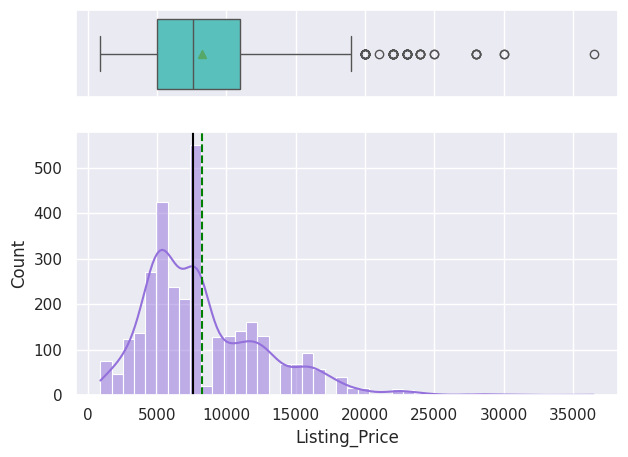

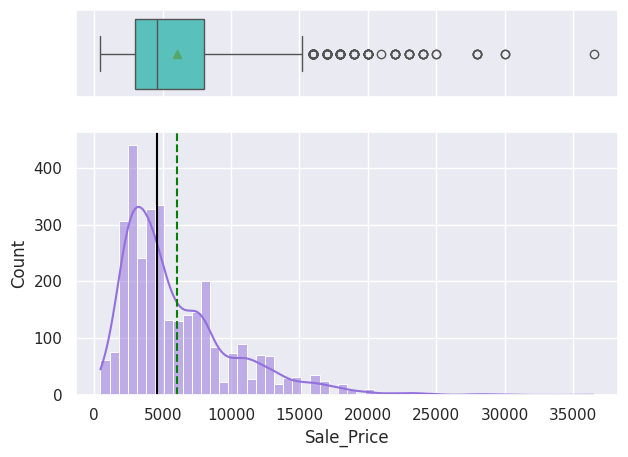

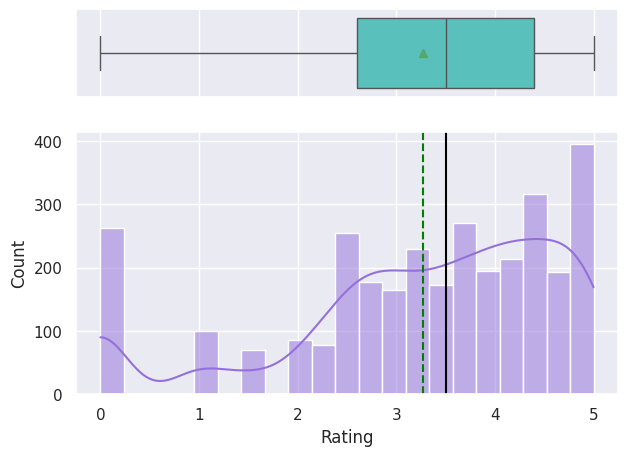

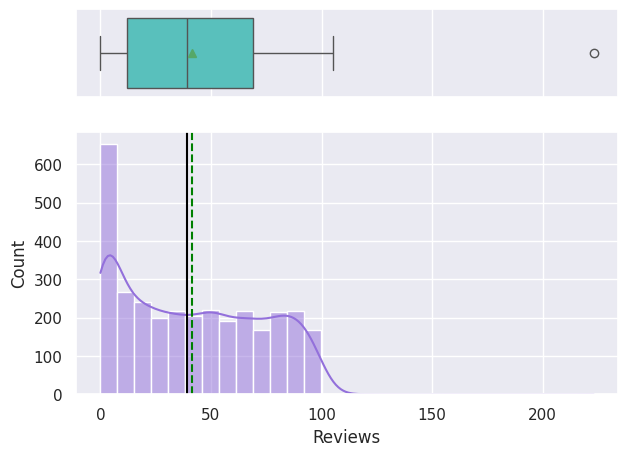

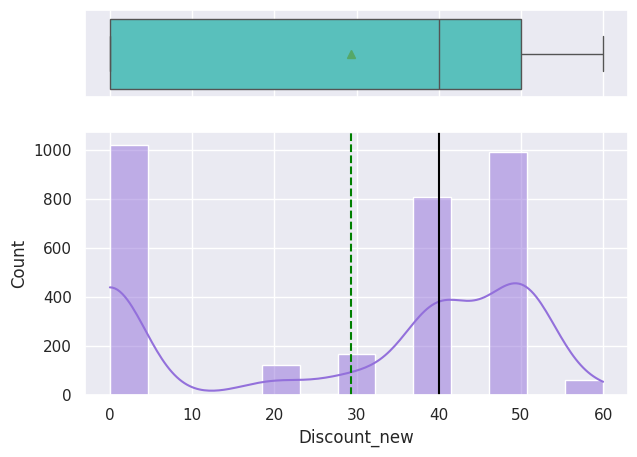

In [ ]:
# loop through each column and create a bar plot for each feature
#
for col in num_cols: # features = column  name
    histogram_boxplot(data=df, feature=col)

**Observations**

- Listing price and sale price have right-skewed distributions with upper outliers, which indicates the presence of very expensive products.
- The maximum discount given is 60%.
- Rating is left-skewed and most of the ratings are between 2.5 and 4.5.
- The number of reviews is between 1 and 100, with an outlier value above 200.

<ipython-input-32-926eaaaeed2f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


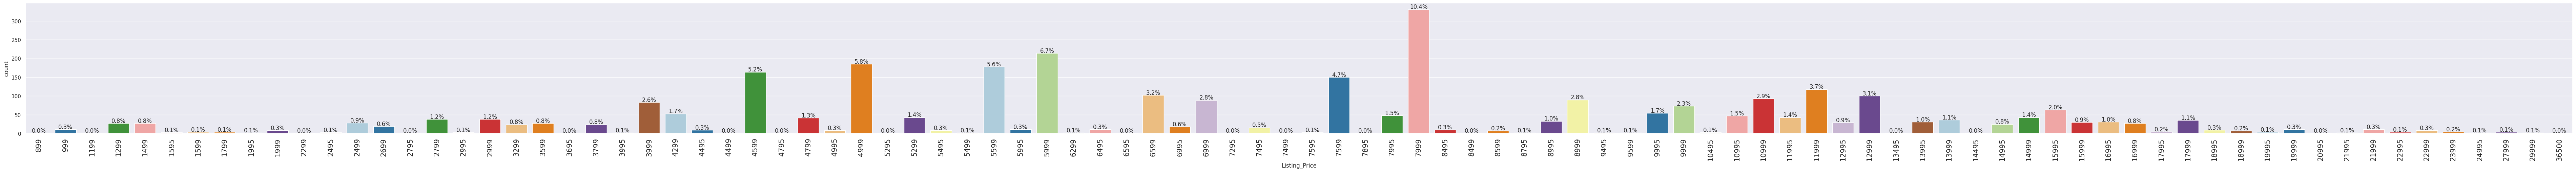

<ipython-input-32-926eaaaeed2f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


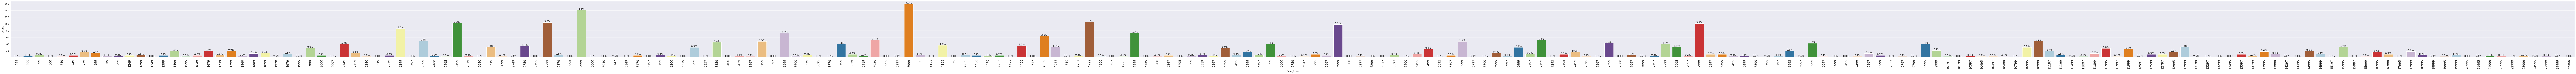

<ipython-input-32-926eaaaeed2f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


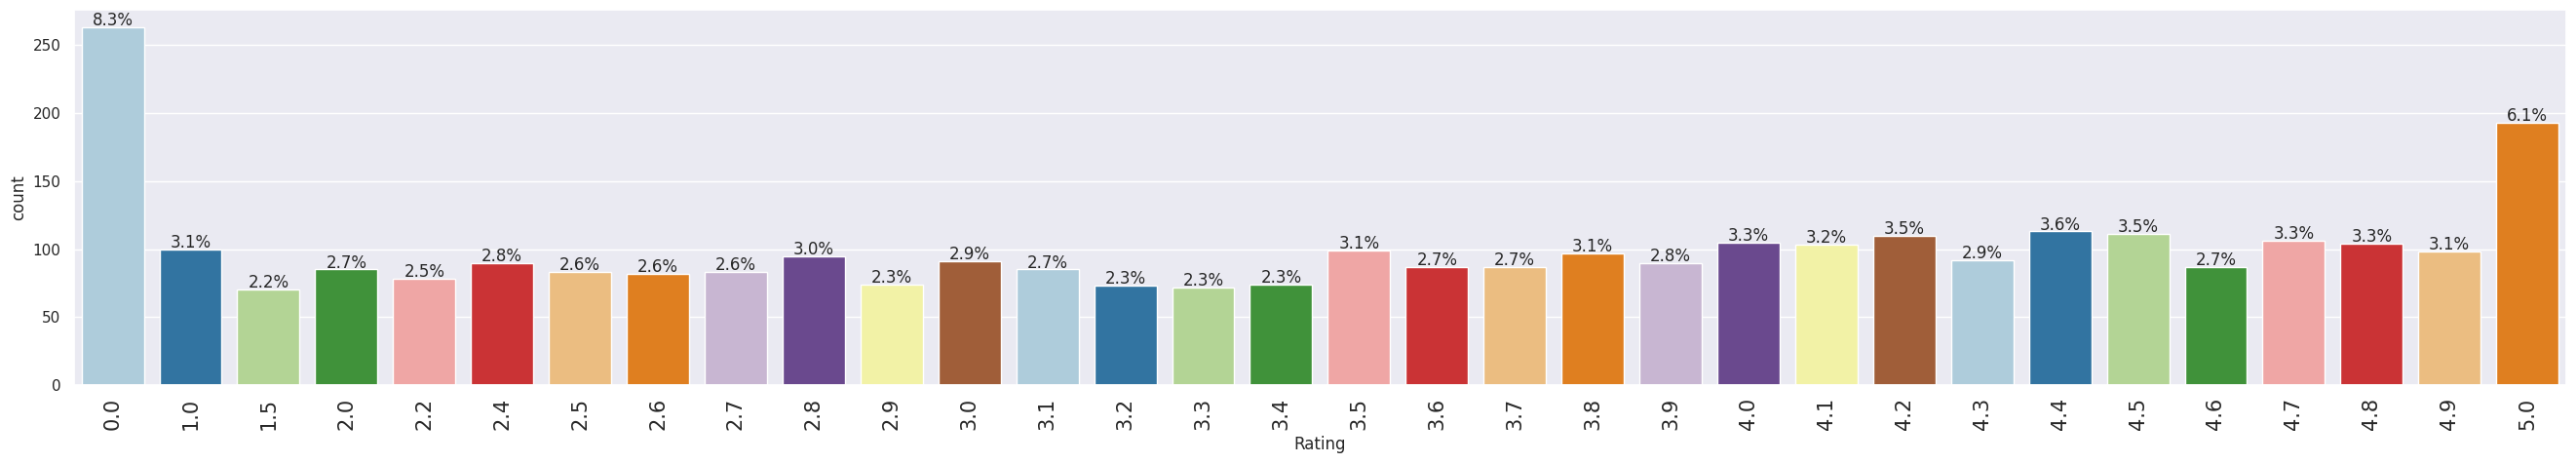

<ipython-input-32-926eaaaeed2f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


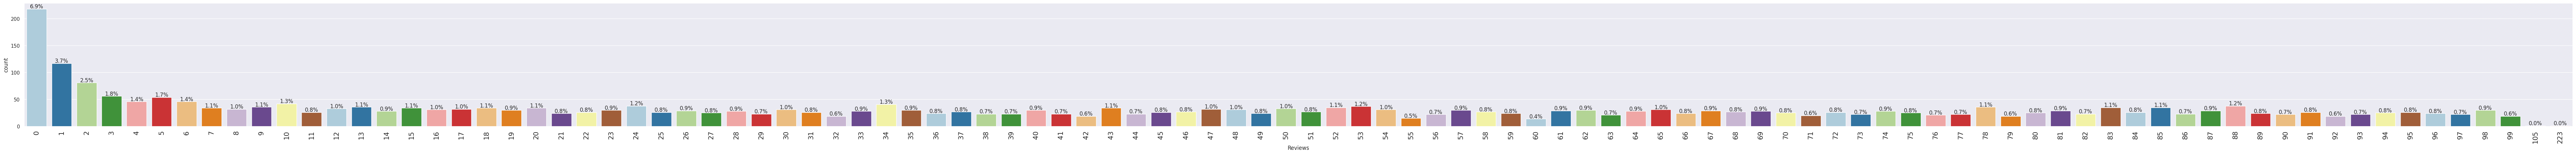

<ipython-input-32-926eaaaeed2f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


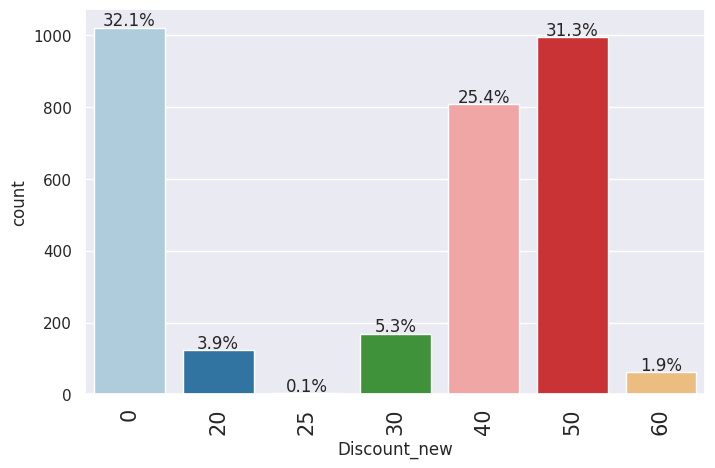

In [ ]:
# loop through each column and create a bar plot for each feature
#
for col in num_cols: # features = column  name
    labeled_barplot(data = df, feature=col, perc=True)

**Observations**

- 32.1% of products did not have any discounts.
- More than 50% of the products have 40-50% discount.

## Bivariate Analysis

**Let's check for correlations.**

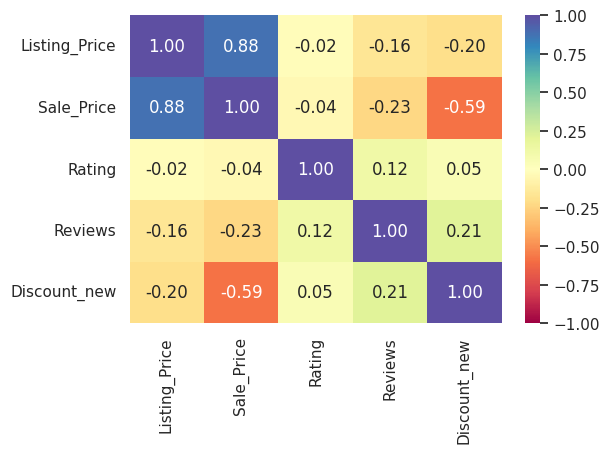

In [ ]:
cor = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor, vmin= -1, vmax= 1, cmap="Spectral",annot=True,fmt=".2f")
plt.show()

**Observations**

- The sale price and the listing price are highly positively correlated, which is obvious.
- Discount is somewhat negatively correlated with listing price or sale price, which indicates that expensive products either have fewer discounts or no discounts at all.

## Data Preprocessing

In [ ]:
# dataset with numeric variables used for clustering

num_data =df[num_cols]

In [ ]:
# scaling the dataset before clustering

scaler = StandardScaler()
num_data_sd = scaler.fit_transform(num_data)

### DBSCAN

- negative -1 represent the noise (outliers)

In [ ]:
# create an instance of the DBSCAN
dbscan = DBSCAN()

"""
fit and predict the labels

dbscan.fit(num_data_sd) # this will return a model that can be saved

then we can predict it to get the labels. the group

db_labels = dbscan.fit_predict(num_data_sd)
"""

db_labels = dbscan.fit_predict(num_data_sd) # this will return the groups, not the model


In [ ]:
# check the labels
np.unique(db_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

**Obervation**

-  -1 group is the noise
- there too mang group

#### Choosing optimal values of eps and minPts

- eps the maximum  distance bew two samples for one to be considered as in a neighboorhood of each other default = 0.5
- minpts  the number of samples in a neighboorhood for a point to be considered as a core point. this include the point itself

In [ ]:
# Trying values of eps between 0.1 and 1; minPts between 2 and 10
eps = np.linspace(0.1,1,10) # it need 10 equal values between 0.1 and 1
minpts = np.arange(2,10)

In [ ]:
# Create a tuple of eps and minPts using product method of itertools
list(itertools.product(eps,minpts))


[(0.1, 2),
 (0.1, 3),
 (0.1, 4),
 (0.1, 5),
 (0.1, 6),
 (0.1, 7),
 (0.1, 8),
 (0.1, 9),
 (0.2, 2),
 (0.2, 3),
 (0.2, 4),
 (0.2, 5),
 (0.2, 6),
 (0.2, 7),
 (0.2, 8),
 (0.2, 9),
 (0.30000000000000004, 2),
 (0.30000000000000004, 3),
 (0.30000000000000004, 4),
 (0.30000000000000004, 5),
 (0.30000000000000004, 6),
 (0.30000000000000004, 7),
 (0.30000000000000004, 8),
 (0.30000000000000004, 9),
 (0.4, 2),
 (0.4, 3),
 (0.4, 4),
 (0.4, 5),
 (0.4, 6),
 (0.4, 7),
 (0.4, 8),
 (0.4, 9),
 (0.5, 2),
 (0.5, 3),
 (0.5, 4),
 (0.5, 5),
 (0.5, 6),
 (0.5, 7),
 (0.5, 8),
 (0.5, 9),
 (0.6, 2),
 (0.6, 3),
 (0.6, 4),
 (0.6, 5),
 (0.6, 6),
 (0.6, 7),
 (0.6, 8),
 (0.6, 9),
 (0.7000000000000001, 2),
 (0.7000000000000001, 3),
 (0.7000000000000001, 4),
 (0.7000000000000001, 5),
 (0.7000000000000001, 6),
 (0.7000000000000001, 7),
 (0.7000000000000001, 8),
 (0.7000000000000001, 9),
 (0.8, 2),
 (0.8, 3),
 (0.8, 4),
 (0.8, 5),
 (0.8, 6),
 (0.8, 7),
 (0.8, 8),
 (0.8, 9),
 (0.9, 2),
 (0.9, 3),
 (0.9, 4),
 (0.9, 5),
 (0.

#### Implementing DBSCAN across the different hyperparameters

**Determining the optimum number of clusters**

- The code block below iterate through different combinations of eps and minpts, performing DBSCAN clustering with each combination and printing the results including the silhouette score.

In [ ]:
# Generate a list of hyperparameter combinations
hyper_list = list(itertools.product(eps, minpts))

# Loop through each combination and perform DBSCAN clustering
for (eps, minpts) in hyper_list:
    dbscan = DBSCAN(eps=eps, min_samples=minpts)
    labels = dbscan.fit_predict(num_data_sd)

    # Calculate silhouette score
    score = silhouette_score(num_data_sd, labels)

    # Print results
    print(f"eps:{eps}; minpts: {minpts}; num_labels:{len(np.unique(labels))}; score:{score}")


eps:0.1; minpts: 2; num_labels:315; score:-0.3798089693934967
eps:0.1; minpts: 3; num_labels:92; score:-0.5096989433127183
eps:0.1; minpts: 4; num_labels:36; score:-0.46929732151110837
eps:0.1; minpts: 5; num_labels:20; score:-0.35341297754181467
eps:0.1; minpts: 6; num_labels:18; score:-0.04409226513725357
eps:0.1; minpts: 7; num_labels:14; score:-0.01726974803017316
eps:0.1; minpts: 8; num_labels:13; score:-0.022598058506718036
eps:0.1; minpts: 9; num_labels:6; score:0.19330632644703816
eps:0.2; minpts: 2; num_labels:432; score:-0.12230054993818196
eps:0.2; minpts: 3; num_labels:192; score:-0.28912327305845814
eps:0.2; minpts: 4; num_labels:110; score:-0.361746782410224
eps:0.2; minpts: 5; num_labels:55; score:-0.4113488023532862
eps:0.2; minpts: 6; num_labels:39; score:-0.4409794074309648
eps:0.2; minpts: 7; num_labels:27; score:-0.4216291002949477
eps:0.2; minpts: 8; num_labels:23; score:-0.4302383004696847
eps:0.2; minpts: 9; num_labels:19; score:-0.4379732205150573
eps:0.30000000

Based on the provided results, the best combination of hyperparameters for DBSCAN clustering seems to be:

- Epsilon (eps): 1.0
- Minimum Points (minpts): 2 or 3
- Number of Labels (num_labels): 3
- Silhouette Score (score): 0.46660981981225486

This combination yields a relatively high silhouette score compared to other configurations, indicating better clustering quality. The silhouette score measures how well-defined the clusters are, with values closer to 1 indicating dense, well-separated clusters. Additionally, the number of labels (clusters) is relatively low, suggesting meaningful clustering without excessive fragmentation. Therefore, the combination of epsilon=1.0 and minpts=2 appears to be the most effective for this dataset.

#### Rebuild the DBSCAN model
- Using the values of eps and minPts above

In [ ]:
# rebuild the model eps:1.0; minpts: 3; num_labels:3; score:0.46660981981225486
dbscan2 = DBSCAN(eps = 1.0, min_samples=3)
db_labels2=dbscan2.fit_predict(num_data_sd)

In [ ]:
# check the unique labels
np.unique(db_labels2)

array([-1,  0,  1])

In [ ]:
# add the dbscan labels to the original data
num_data["db_labels"] = db_labels2


<ipython-input-76-4ab85b588b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data["db_labels"] = db_labels2


### visualizing groups

In [ ]:
# checking the comlumns
num_data.columns

Index(['Listing_Price', 'Sale_Price', 'Rating', 'Reviews', 'Discount_new',
       'db_labels'],
      dtype='object')

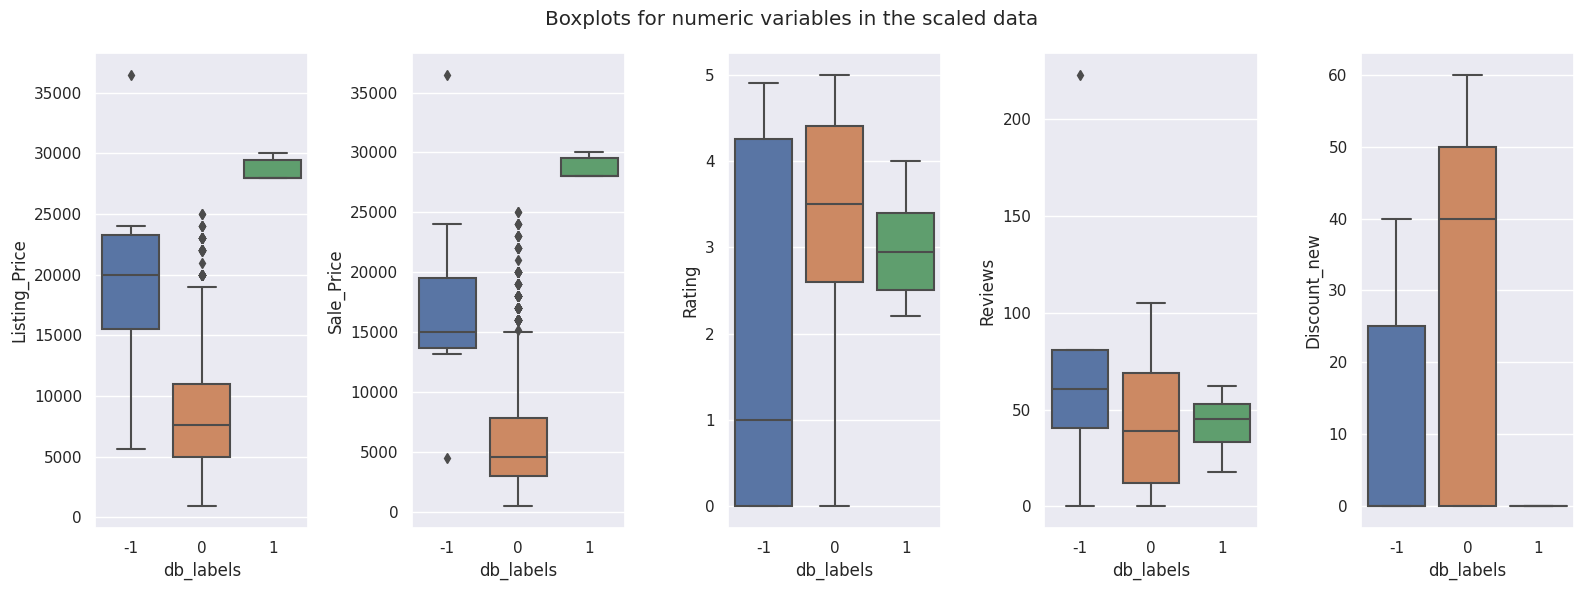

In [ ]:
# examine same in the original variables

fig, ax = plt.subplots(1, 5, figsize = (16, 6))
fig.suptitle("Boxplots for numeric variables in the scaled data")

count = 0
for i in range(5):
    sns.boxplot(ax = ax[i], x = num_data["db_labels"],y = num_data[num_cols[count]])
    count += 1
fig.tight_layout()

**Group 1:** Companies in this group are characterized by high listing prices and sale prices, accompanied by high ratings and reviews, despite offering low discounts. This suggests that these companies are able to command premium prices for their products or services due to their perceived value and quality. Customers are willing to pay higher prices because they are satisfied with the offerings and have positive experiences. Therefore, these companies may focus on maintaining their high-quality standards and continue delivering excellent customer experiences.


**Group 0:** Companies in this group have lower listing prices and sale prices, but they receive mixed ratings and reviews despite offering large discounts. This indicates that while these companies may attract customers with their competitive pricing, they struggle to consistently meet customer expectations in terms of product quality or service delivery. To improve their performance, these companies should prioritize enhancing their promotional strategies to increase brand visibility and attract more customers. Additionally, they may need to address any underlying issues affecting customer satisfaction, such as product quality or customer service, to ensure a positive overall experience and foster loyalty.







### View the  company brand belonging to group 1 and 2

In [ ]:
## attaching the db_label to the orignal data
df["db_labels"] = db_labels2

**Group 1**

In [ ]:
df.query("db_labels==1")

,Product_ID,Listing_Price,Sale_Price,Brand,Rating,Reviews,Discount_new,db_labels
1438,EF9625,27999,27999,Adidas ORIGINALS,2.8,32,0,1
1553,EF9624,27999,27999,Adidas ORIGINALS,3.5,18,0,1
1563,EF9623,27999,27999,Adidas ORIGINALS,3.1,62,0,1
1642,FV6106,27999,27999,Adidas SPORT PERFORMANCE,2.2,53,0,1
2554,BD7927,29999,29999,Adidas ORIGINALS,2.4,37,0,1
2579,BD7865,29999,29999,Adidas ORIGINALS,4.0,53,0,1


In [ ]:
#checking the unique brand
df.loc[(df.db_labels==1), "Brand"].unique()

array(['Adidas ORIGINALS', 'Adidas SPORT PERFORMANCE'], dtype=object)

- Group 1 encompasses brands like Adidas ORIGINALS and Adidas SPORT PERFORMANCE, renowned for their premium positioning in the market. These brands are synonymous with innovation and top-notch quality, evident in their premium pricing and consistent customer satisfaction ratings. Despite offering minimal discounts, they maintain a loyal customer base, reflecting their commitment to delivering cutting-edge designs and exceptional performance in athletic and lifestyle products.

**Group 2**

In [ ]:
df.loc[df.db_labels==0]

,Product_ID,Listing_Price,Sale_Price,Brand,Rating,Reviews,Discount_new,db_labels
0,AH2430,14999,7499,Adidas Adidas ORIGINALS,4.8,41,50,0
1,G27341,7599,3799,Adidas ORIGINALS,3.3,24,50,0
2,CM0081,999,599,Adidas CORE / NEO,2.6,37,40,0
3,B44832,6999,3499,Adidas CORE / NEO,4.1,35,50,0
4,D98205,7999,3999,Adidas ORIGINALS,3.5,72,50,0
...,...,...,...,...,...,...,...,...
3175,AT6100-606,6495,6495,Nike,0.0,0,0,0
3176,CT9155-063,13995,13995,Nike,3.0,1,0,0
3177,CI1236-100,15995,12797,Nike,5.0,1,20,0
3178,AH6799-300,16995,16995,Nike,4.0,4,0,0


In [ ]:
#checking the unique brand
df.loc[(df.db_labels==0), "Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

On the other hand, Group 0 comprises brands like Adidas ORIGINALS, Adidas CORE / NEO, Adidas SPORT PERFORMANCE, and Nike, presenting a diverse array of offerings with competitive pricing strategies. While these brands offer affordability, they face challenges in maintaining consistent customer satisfaction levels. Adidas ORIGINALS and Adidas CORE / NEO, with their casual lifestyle products, and Adidas SPORT PERFORMANCE, emphasizing athletic gear, encounter hurdles in ensuring satisfaction despite their affordability. Similarly, Nike, a global leader in athletic footwear and apparel, experiences variability in customer feedback despite extensive product range and promotional efforts.


To enhance their market position and performance, companies in Group 0 may benefit from investing in promotional strategies, improving product quality, and bolstering customer service initiatives to foster stronger brand loyalty and elevate overall customer satisfaction levels.





